### Non parametric Kruskal-Wallis H test for independent samples

##### Homework 9: Evaluate the Kuskal-Wallis H test for DIC and temperature. Create boxplots and violun plots for the analyses. 

In [2]:
def import_csv (file):
    import pandas as pd
    return pd.read_csv (file)

In [3]:
# Path to the file to be imported
path = "Course_data.csv"

# Import the file and convert to a dataframe
data_df = import_csv(path)

In [14]:
DIC = data_df['dic_micromol_kg']
temp = data_df['temp_c']

In [5]:
from scipy.stats import kruskal

#*groups => permite n grupo de variables
def kruskal_wallis_test(*groups, alpha= 0.05):
    result = kruskal (*groups)
    
    print(f'H statistic = {result.statistic}')
    print(f'p-value = {result.pvalue}')

    if result.pvalue < alpha:
        print('The difference between groups is statistically significant.')
    else:
        print('No statistcally significant difference between groups.')

In [12]:
import scikit_posthocs as sp

def dunn_posthoc(data, group_col, value_col, p_adjust='bonferroni'):
    """
    Runs Dunn's post-hoc test after Kruskal-Wallis.
    """
    result = sp.posthoc_dunn(data, val_col=value_col, group_col=group_col, p_adjust=p_adjust)
    print(result)
    return result

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(
    font="Georgia",          # Fuente global
    font_scale=1.1,          # Escala general de texto
    style="whitegrid",     # Fondo y estilo de grilla
    rc={                     # Parámetros extra de matplotlib
        "axes.titlesize": 14,            # Tamaño de título
        "xtick.labelsize": 11,           # Tamaño ticks X
        "ytick.labelsize": 11            # Tamaño ticks Y
    }
)

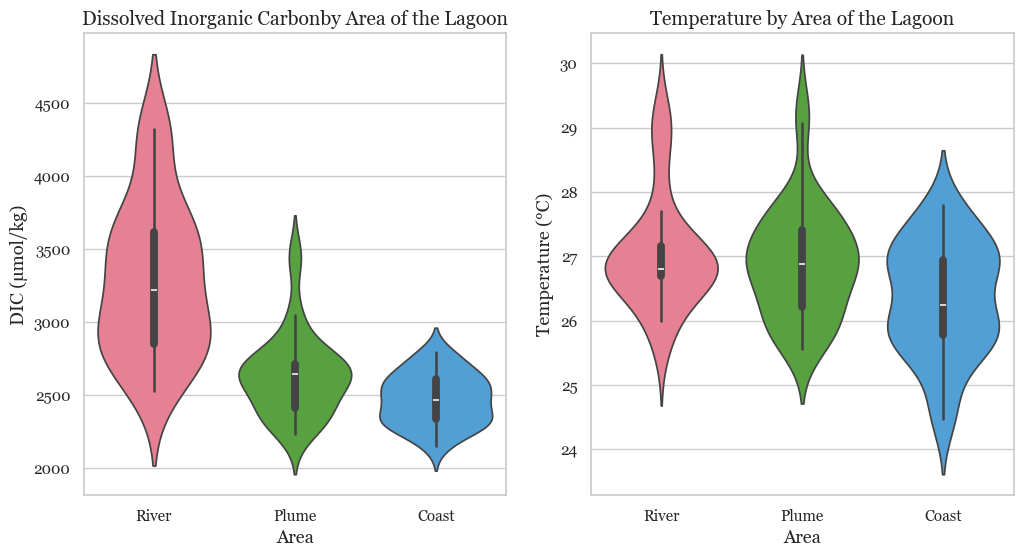

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

################## Boxplot for DIC ##################
sns.violinplot(x='area', y='dic_micromol_kg', data=data_df, 
            ax=axes[0], hue= 'area', palette='husl')
axes[0].set_title('Dissolved Inorganic Carbonby Area of the Lagoon')
axes[0].set_xlabel('Area')
axes[0].set_ylabel('DIC (µmol/kg)')

################## Boxplot for Temperature ##################
sns.violinplot(x='area', y='temp_c', data=data_df, 
            ax=axes[1], hue= 'area', palette='husl')
axes[1].set_title('Temperature by Area of the Lagoon')
axes[1].set_xlabel('Area')
axes[1].set_ylabel('Temperature (°C)')

#plt.tight_layout()
plt.show()

In [51]:
# DIC for each area of the lagoon
DIC_river = data_df[data_df['area'] == 'River']['dic_micromol_kg']
DIC_plume = data_df[data_df['area'] == 'Plume']['dic_micromol_kg']
DIC_coast= data_df[data_df['area'] == 'Coast']['dic_micromol_kg']

In [52]:
# Temperature for each area of the lagoon
temp_river = data_df[data_df['area'] == 'River']['temp_c']
temp_plume = data_df[data_df['area'] == 'Plume']['temp_c']
temp_coast= data_df[data_df['area'] == 'Coast']['temp_c']

##### *Kruskal-Wallis for DIC data*

In [ ]:
kruskal_wallis_test(DIC_river, DIC_plume, DIC_coast)

H statistic = 55.889669058187486
p-value = 7.306553461098262e-13
The difference between groups is statistically significant.


##### *Kruskal-Wallis for temperature data*

In [53]:
kruskal_wallis_test(temp_river, temp_plume, temp_coast)

H statistic = 7.6996429549091365
p-value = 0.021283535690208223
The difference between groups is statistically significant.


##### *Pst-hoc test for DIC data*

In [20]:
dunn_posthoc(data_df, 'area', 'dic_micromol_kg')

              Coast     Plume         River
Coast  1.000000e+00  0.063144  7.204720e-13
Plume  6.314392e-02  1.000000  1.885873e-06
River  7.204720e-13  0.000002  1.000000e+00


,Coast,Plume,River
Coast,1.000000e+00,0.063144,7.204720e-13
Plume,6.314392e-02,1.000000,1.885873e-06
River,7.204720e-13,0.000002,1.000000e+00


##### *Pst-hoc test for temperature data*

In [55]:
dunn_posthoc(data_df, 'area', 'temp_c')

          Coast    Plume     River
Coast  1.000000  0.06468  0.038761
Plume  0.064680  1.00000  1.000000
River  0.038761  1.00000  1.000000


,Coast,Plume,River
Coast,1.000000,0.06468,0.038761
Plume,0.064680,1.00000,1.000000
River,0.038761,1.00000,1.000000
